# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [14]:
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4.766
Date:                Sat, 02 Mar 2024   Prob (F-statistic):             0.0777
Time:                        01:30:18   Log-Likelihood:                -7.4460
No. Observations:                  10   AIC:                             26.89
Df Residuals:                       4   BIC:                             28.71
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.0267      1.751     -1.729

C:\Users\Cliente\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


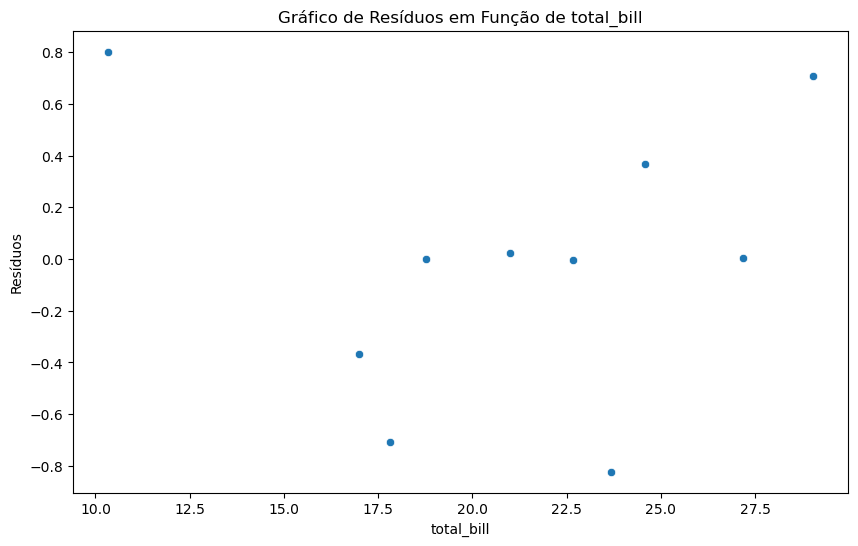

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy


tips = pd.DataFrame(data)

# I. Modelo no valor da gorjeta

# Criando a matriz de design e a matriz y usando o Patsy
formula = 'tip ~ sex + smoker + day + total_bill'
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Ajustando o modelo linear
model = sm.OLS(y, X).fit()

# Imprimindo o resumo do modelo
print(model.summary())

# II. Gráfico de resíduos em função de total_bill

# Calculando os resíduos
residuals = model.resid

# Plotando o gráfico de resíduos em função de total_bill
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['total_bill'], y=residuals)
plt.title('Gráfico de Resíduos em Função de total_bill')
plt.xlabel('total_bill')
plt.ylabel('Resíduos')
plt.show()










### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     4.732
Date:                Sat, 02 Mar 2024   Prob (F-statistic):             0.0786
Time:                        01:35:43   Log-Likelihood:                 2.7872
No. Observations:                  10   AIC:                             6.426
Df Residuals:                       4   BIC:                             8.241
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.4851      0.629     -2.360

C:\Users\Cliente\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\Cliente\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


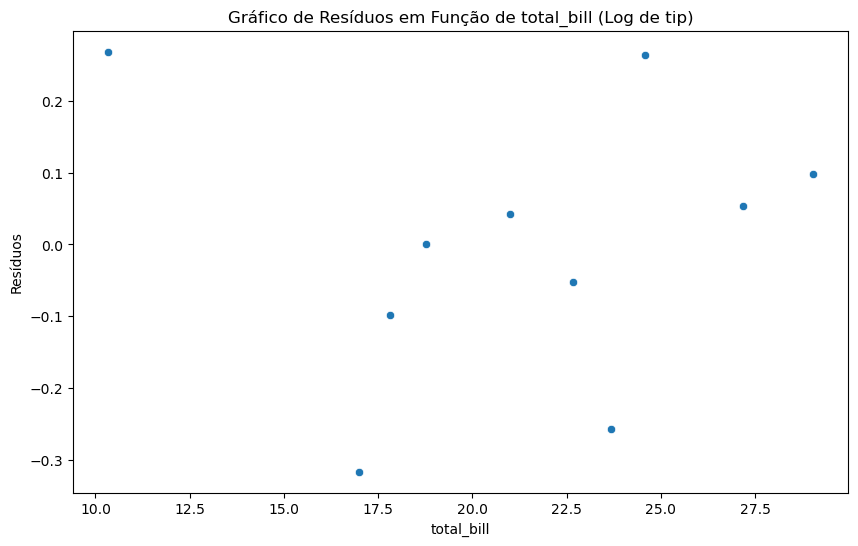

In [29]:
# Modelo no valor do percentual da gorjeta

# Criando a matriz de design e a matriz y usando o Patsy (usando o log de tip)
formula_log_tip = 'np.log(tip) ~ sex + smoker + day + total_bill'
y_log_tip, X_log_tip = patsy.dmatrices(formula_log_tip, data=tips, return_type='dataframe')

# Ajustando o modelo linear
model_log_tip = sm.OLS(y_log_tip, X_log_tip).fit()

# Imprimindo o resumo do modelo
print(model_log_tip.summary())

# Imprimir as colunas disponíveis em X_log_tip
print("Colunas em X_log_tip:", X_log_tip.columns)

# Removendo variáveis não significativas
significant_vars_log_tip = ['Intercept', 'sex[T.Male]', 'smoker[T.Yes]', 'total_bill']
# Incluindo todas as categorias das variáveis categóricas
for col in X_log_tip.columns:
    if 'day' in col and col not in significant_vars_log_tip:
        significant_vars_log_tip.append(col)

X_log_tip = X_log_tip[significant_vars_log_tip]

# Refit do modelo após remover variáveis não significativas
model_log_tip = sm.OLS(y_log_tip, X_log_tip).fit()

# Imprimindo novamente o resumo do modelo
print(model_log_tip.summary())

# Gráfico de resíduos em função de total_bill
residuals_log_tip = model_log_tip.resid
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tips['total_bill'], y=residuals_log_tip)
plt.title('Gráfico de Resíduos em Função de total_bill (Log de tip)')
plt.xlabel('total_bill')
plt.ylabel('Resíduos')
plt.show()








### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [34]:
df = pd.read_csv('./previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [37]:
 ## Tratar valores ausentes em tempo_emprego
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)

# Converter variáveis categóricas para dummies
df = pd.get_dummies(df, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

# Remover coluna desnecessária
df = df.drop(['Unnamed: 0'], axis=1)

# Exibir informações sobre o DataFrame após as alterações
df.info()

# Exibir as primeiras linhas do DataFrame
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       15000 non-null  object 
 1   id_cliente                     15000 non-null  int64  
 2   posse_de_veiculo               15000 non-null  bool   
 3   posse_de_imovel                15000 non-null  bool   
 4   qtd_filhos                     15000 non-null  int64  
 5   idade                          15000 non-null  int64  
 6   tempo_emprego                  15000 non-null  float64
 7   qt_pessoas_residencia          15000 non-null  float64
 8   renda                          15000 non-null  float64
 9   sexo_M                         15000 non-null  bool   
 10  tipo_renda_Bolsista            15000 non-null  bool   
 11  tipo_renda_Empresário          15000 non-null  bool   
 12  tipo_renda_Pensionista         15000 non-null 

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,15056,False,True,0,26,6.602740,1.0,8060.34,False,...,False,False,True,False,False,True,False,False,False,False
1,2015-01-01,9968,True,True,0,28,7.183562,2.0,1852.15,True,...,False,False,False,False,False,True,False,False,False,False
2,2015-01-01,4312,True,True,0,35,0.838356,2.0,2253.89,False,...,False,False,False,False,False,True,False,False,False,False
3,2015-01-01,10639,False,True,1,30,4.846575,3.0,6600.77,False,...,False,False,False,False,False,True,False,False,False,False
4,2015-01-01,7064,True,False,0,33,4.293151,1.0,6475.97,True,...,False,False,True,False,False,False,False,False,False,True


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2483.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:39:40   Log-Likelihood:            -1.5543e+05
No. Observations:               15000   AIC:                         3.109e+05
Df Residuals:                   14998   BIC:                         3.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1758.6514    100.786     17.449

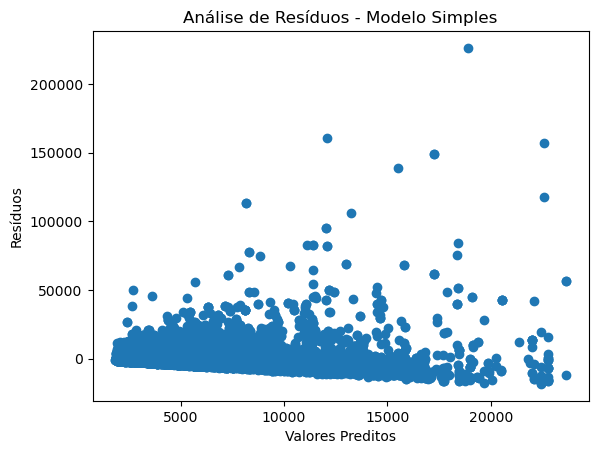

p-valor do teste de homocedasticidade: 2.2028798660330136e-85


In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

# Ajuste do modelo de regressão linear simples
X_simple = sm.add_constant(df['tempo_emprego'])
y = df['renda']

model_simple = sm.OLS(y, X_simple).fit()

# Resumo do modelo
print(model_simple.summary())

# Análise de resíduos
residuals = model_simple.resid
predicted = model_simple.fittedvalues

# Gráfico de resíduos vs valores preditos
plt.scatter(predicted, residuals)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos - Modelo Simples')
plt.show()

# Teste de homocedasticidade (dispersão constante)
_, p_value, _, _ = het_breuschpagan(residuals, X_simple)
print(f'p-valor do teste de homocedasticidade: {p_value}')
